In [17]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3),alpha=0.25)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  

x = Flatten()(x) 
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x)  
x = Dropout(0.5)(x) 

# x = Dense(512, activation='relu')(x)  
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setup the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="training")

validation_generator = train_datagen.flow_from_directory(
    r'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation")

Found 7229 images belonging to 2 classes.
Found 1806 images belonging to 2 classes.


In [19]:
# Fit the model
model.fit(
    train_generator,
    epochs=2, validation_data=validation_generator)


Epoch 1/2
226/226 [==============================] - 136s 595ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 4.1460e-04 - val_accuracy: 1.0000
Epoch 2/2
226/226 [==============================] - 84s 373ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 2.2614e-04 - val_accuracy: 1.0000


In [13]:
eval_result = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))


56/56 [==============================] - 19s 335ms/step - loss: 8.0054e-06 - accuracy: 1.0000
Loss: 0.00001, Accuracy: 100.00%


In [14]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
predicted_classes = predictions.argmax(axis=-1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get class labels from the generator


56/56 [==============================] - 17s 301ms/step


57/57 [==============================] - 16s 286ms/step - loss: 9.8702e-06 - accuracy: 1.0000
Loss: 0.00001, Accuracy: 100.00%
57/57 [==============================] - 16s 287ms/step


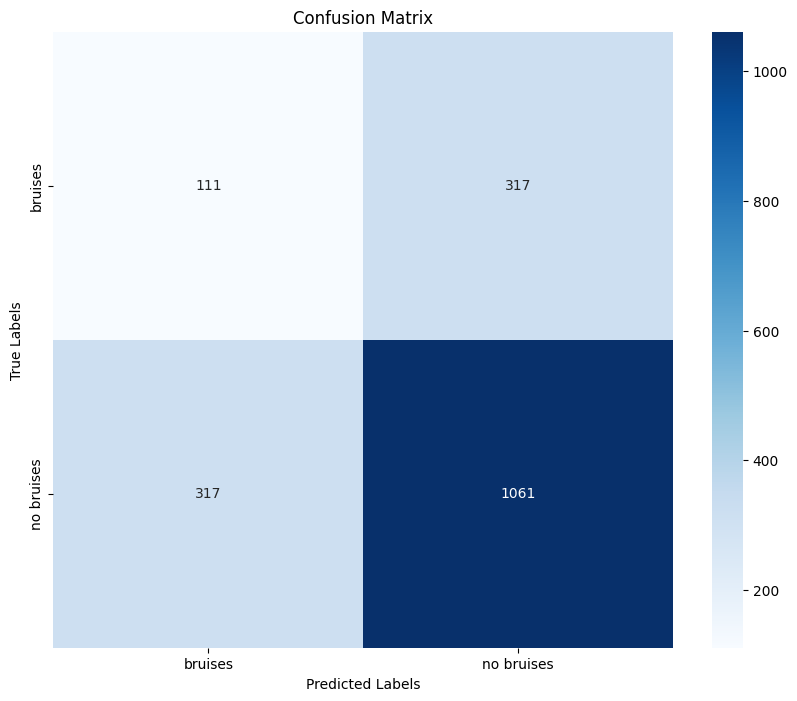

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Calculate the correct number of steps per epoch
test_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Evaluate the model
eval_result = model.evaluate(validation_generator, steps=test_steps)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))

# Predict classes
predictions = model.predict(validation_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=-1)


# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [16]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       428
           1       0.77      0.77      0.77      1378

    accuracy                           0.65      1806
   macro avg       0.51      0.51      0.51      1806
weighted avg       0.65      0.65      0.65      1806



In [ ]:
model.save("mobilent_br.h5")

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import ResNetRS101
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top layer
base_model = ResNetRS101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  

x = Flatten()(x) 
x = Dense(1024, activation='relu')(x) 
x = BatchNormalization()(x)  
x = Dropout(0.5)(x) 

x = Dense(512, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [20]:
# Fit the model
model.fit(
    train_generator,
    epochs=10, validation_data=validation_generator)


Epoch 1/10
226/226 [==============================] - 743s 3s/step - loss: 0.1051 - accuracy: 0.9686 - val_loss: 0.0434 - val_accuracy: 0.9839
Epoch 2/10
226/226 [==============================] - 731s 3s/step - loss: 0.0456 - accuracy: 0.9881 - val_loss: 0.0618 - val_accuracy: 0.9690
Epoch 3/10
226/226 [==============================] - 759s 3s/step - loss: 0.0298 - accuracy: 0.9931 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 4/10
226/226 [==============================] - 890s 4s/step - loss: 0.0273 - accuracy: 0.9932 - val_loss: 0.0013 - val_accuracy: 0.9994
Epoch 5/10
226/226 [==============================] - 917s 4s/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 6/10
226/226 [==============================] - 763s 3s/step - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 7/10
226/226 [==============================] - 739s 3s/step - loss: 0.0256 - accuracy: 0.9939 - val_loss: 5.8939e-04 - val_accuracy: 1.

In [21]:
eval_result = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))


56/56 [==============================] - 267s 5s/step - loss: 3.2242e-04 - accuracy: 1.0000
Loss: 0.00032, Accuracy: 100.00%


In [22]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
predicted_classes = predictions.argmax(axis=-1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get class labels from the generator


56/56 [==============================] - 293s 5s/step


57/57 [==============================] - 267s 5s/step - loss: 3.3779e-04 - accuracy: 1.0000
Loss: 0.00034, Accuracy: 100.00%
57/57 [==============================] - 274s 5s/step


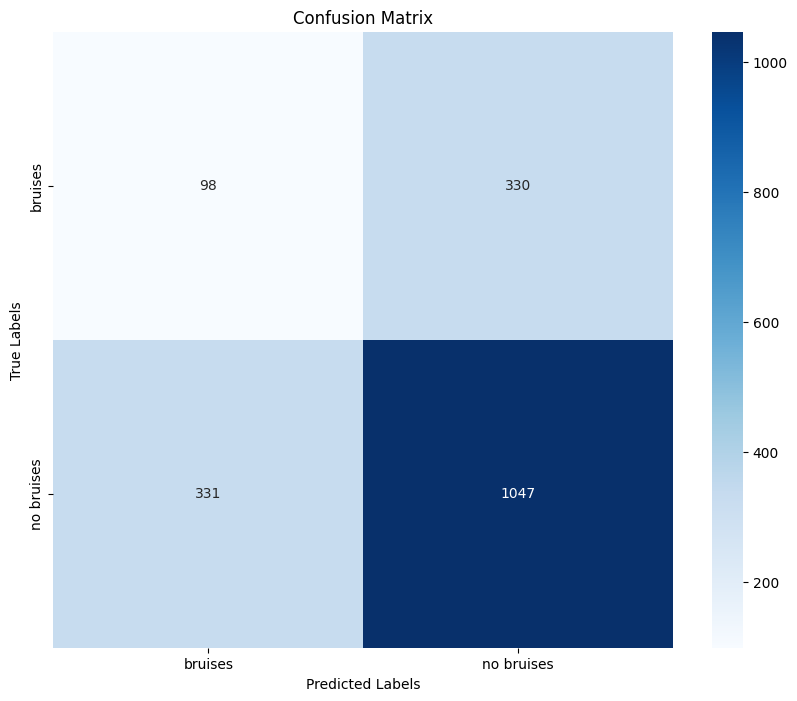

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Calculate the correct number of steps per epoch
test_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Evaluate the model
eval_result = model.evaluate(validation_generator, steps=test_steps)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))

# Predict classes
predictions = model.predict(validation_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=-1)


# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [24]:
model.save("resnet_br.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  

x = Flatten()(x) 
x = Dense(1024, activation='relu')(x) 
x = BatchNormalization()(x)  
x = Dropout(0.5)(x) 

x = Dense(512, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [26]:
# Fit the model
model.fit(
    train_generator,
    epochs=10, validation_data=validation_generator)


Epoch 1/10
226/226 [==============================] - 1273s 6s/step - loss: 0.0193 - accuracy: 0.9929 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2/10
226/226 [==============================] - 1031s 5s/step - loss: 7.5399e-04 - accuracy: 0.9997 - val_loss: 7.0039e-05 - val_accuracy: 1.0000
Epoch 3/10
226/226 [==============================] - 1017s 4s/step - loss: 4.4790e-04 - accuracy: 0.9999 - val_loss: 3.6421e-06 - val_accuracy: 1.0000
Epoch 4/10
226/226 [==============================] - 1016s 4s/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 6.6007e-11 - val_accuracy: 1.0000
Epoch 5/10
226/226 [==============================] - 1018s 5s/step - loss: 4.6355e-04 - accuracy: 0.9999 - val_loss: 4.0122e-06 - val_accuracy: 1.0000
Epoch 6/10
226/226 [==============================] - 1018s 5s/step - loss: 6.2495e-05 - accuracy: 1.0000 - val_loss: 1.2418e-06 - val_accuracy: 1.0000
Epoch 7/10
226/226 [==============================] - 976s 4s/step - loss: 7.3190e-04 - accuracy: 0.

In [27]:
eval_result = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))


56/56 [==============================] - 106s 2s/step - loss: 1.2493e-07 - accuracy: 1.0000
Loss: 0.00000, Accuracy: 100.00%


In [28]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
predicted_classes = predictions.argmax(axis=-1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get class labels from the generator


56/56 [==============================] - 107s 2s/step


57/57 [==============================] - 109s 2s/step - loss: 1.1980e-07 - accuracy: 1.0000
Loss: 0.00000, Accuracy: 100.00%
57/57 [==============================] - 109s 2s/step


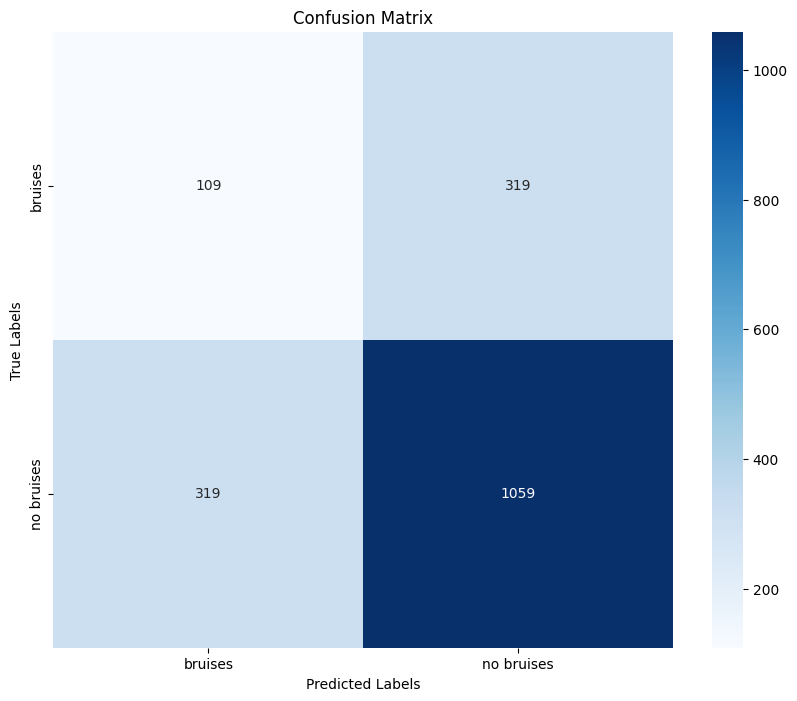

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Calculate the correct number of steps per epoch
test_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Evaluate the model
eval_result = model.evaluate(validation_generator, steps=test_steps)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))

# Predict classes
predictions = model.predict(validation_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=-1)


# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [30]:
model.save("vgg16_br.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25       428
           1       0.77      0.77      0.77      1378

    accuracy                           0.65      1806
   macro avg       0.51      0.51      0.51      1806
weighted avg       0.65      0.65      0.65      1806



In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Adjust this layer depending on your classification needs
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 128)      

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
)


Epoch 1/15
226/226 [==============================] - 783s 3s/step - loss: 0.0394 - accuracy: 0.9913 - val_loss: 1.8231e-07 - val_accuracy: 1.0000
Epoch 2/15
226/226 [==============================] - 718s 3s/step - loss: 1.5537e-06 - accuracy: 1.0000 - val_loss: 5.5776e-08 - val_accuracy: 1.0000
Epoch 3/15
226/226 [==============================] - 740s 3s/step - loss: 5.2921e-07 - accuracy: 1.0000 - val_loss: 2.7525e-08 - val_accuracy: 1.0000
Epoch 4/15
226/226 [==============================] - 702s 3s/step - loss: 2.9092e-07 - accuracy: 1.0000 - val_loss: 1.7228e-08 - val_accuracy: 1.0000
Epoch 5/15
226/226 [==============================] - 709s 3s/step - loss: 2.0547e-07 - accuracy: 1.0000 - val_loss: 7.9869e-09 - val_accuracy: 1.0000
Epoch 6/15
226/226 [==============================] - 697s 3s/step - loss: 1.1316e-07 - accuracy: 1.0000 - val_loss: 3.8944e-09 - val_accuracy: 1.0000
Epoch 7/15
226/226 [==============================] - 762s 3s/step - loss: 8.3689e-08 - accuracy: 

In [18]:
eval_result = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))


56/56 [==============================] - 94s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss: 0.00000, Accuracy: 100.00%


In [21]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
predicted_classes = predictions.argmax(axis=-1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Get class labels from the generator


56/56 [==============================] - 99s 2s/step


57/57 [==============================] - 89s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss: 0.00000, Accuracy: 100.00%
57/57 [==============================] - 87s 2s/step


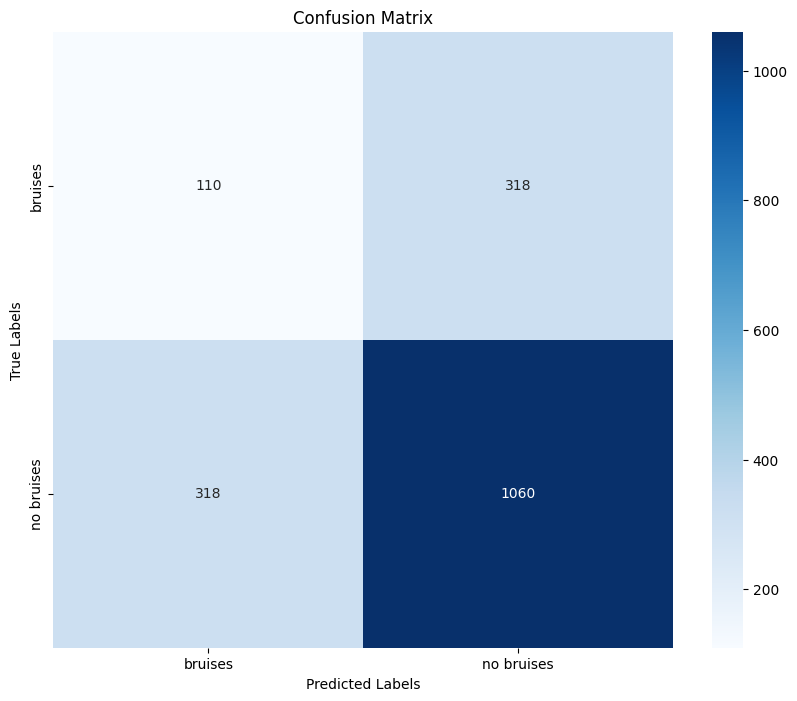

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Calculate the correct number of steps per epoch
test_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Evaluate the model
eval_result = model.evaluate(validation_generator, steps=test_steps)
print("Loss: {:.5f}, Accuracy: {:.2f}%".format(eval_result[0], eval_result[1] * 100))

# Predict classes
predictions = model.predict(validation_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=-1)


# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [23]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       428
           1       0.77      0.77      0.77      1378

    accuracy                           0.65      1806
   macro avg       0.51      0.51      0.51      1806
weighted avg       0.65      0.65      0.65      1806



In [24]:
model.save("cnn_br.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
